# Limpieza del conjunto de datos

## 
<div style="background-color:#682F2F; color:#FFF9ED; text-align:center; padding:10px; border-radius:10px; box-shadow: 5px 5px 10px #888888; font-family: 'Your_Custom_Font', serif; font-size: 150%">
 CARGAR EL CONJUNTO DE DATOS
</div>


In [206]:
import pandas as pd
# Ruta al archivo CSV en tu Google Drive
csv_file_path = "../data/Postulantes.csv"

# Leer el archivo CSV en un DataFrame, especificando la codificación
Postulantes = pd.read_csv(csv_file_path, delimiter=",")

# Mostrar los primeros registros del DataFrame
Postulantes.head()

UUID                         ESCUELA  \
0  eb33a3                INGENIERÍA CIVIL   
1  41b65f                INGENIERÍA CIVIL   
2  60d267  INGENIERÍA AGRONÓMICA TROPICAL   
3  28acbc         INGENIERÍA DE ALIMENTOS   
4  38c971                INGENIERÍA CIVIL   

                                           MODALIDAD  ANNIO_POSTULACION  \
0  PRIMERA OPORTUNIDAD PARA ESTUDIANTES DEL QUINT...               2020   
1  PRIMERA OPORTUNIDAD PARA ESTUDIANTES DEL QUINT...               2020   
2  PRIMERA OPORTUNIDAD PARA ESTUDIANTES DEL QUINT...               2020   
3  PRIMERA OPORTUNIDAD PARA ESTUDIANTES DEL QUINT...               2020   
4  PRIMERA OPORTUNIDAD PARA ESTUDIANTES DEL QUINT...               2020   

   UBIGEO DEPARTAMENTO      PROVINCIA   DISTRITO  UBIGEO_ORIGEN  \
0   80901        CUSCO  LA CONVENCIÓN  SANTA ANA          80901   
1   80901        CUSCO  LA CONVENCIÓN  SANTA ANA          80901   
2   80901        CUSCO  LA CONVENCIÓN  SANTA ANA          80901   
3   80902        CUSCO  LA CONVENCIÓN   ECHARATE          80902   
4   80901        CUSCO  LA CONVENCIÓN  SANTA ANA          80901   

  DEPARTAMENTO_ORIGEN  ... EDAD       SEXO   PAGO   IDIOMA LEE ESCRIBE  HABLA  \
0               CUSCO  ...   20  MASCULINO  250.0  Español  SI      NO     NO   
1               CUSCO  ...   19  MASCULINO  250.0  Español  SI      NO     NO   
2               CUSCO  ...   20  MASCULINO  250.0  Español  SI      NO     NO   
3               CUSCO  ...   20   FEMENINO  200.0  Español  SI      NO     NO   
4               CUSCO  ...   20  MASCULINO  250.0  Español  SI      NO     NO   

  TIENE_DISCAPACIDAD  TIPO_COMUNIDAD COMUNIDAD  
0                 NO         NINGUNA   NINGUNA  
1                 NO         NINGUNA   NINGUNA  
2                 NO         NINGUNA   NINGUNA  
3                 NO         NINGUNA   NINGUNA  
4                 NO         NINGUNA   NINGUNA  

[5 rows x 26 columns]

In [207]:
# Cantidad de valores únicos para cada columna
print(Postulantes.nunique())

UUID                   3748
ESCUELA                   6
MODALIDAD                 8
ANNIO_POSTULACION         5
UBIGEO                  210
DEPARTAMENTO             21
PROVINCIA                65
DISTRITO                202
UBIGEO_ORIGEN           157
DEPARTAMENTO_ORIGEN      12
PROVINCIA_ORIGEN         41
DISTRITO_ORIGEN         140
UBIGEO_IE               166
DEPARTAMENTO_IE          15
PROVINCIA_IE             46
DISTRITO_IE             150
EDAD                     37
SEXO                      2
PAGO                      7
IDIOMA                    8
LEE                       2
ESCRIBE                   2
HABLA                     2
TIENE_DISCAPACIDAD        2
TIPO_COMUNIDAD            3
COMUNIDAD                 5
dtype: int64


## 
<div style="background-color:#682F2F; color:#FFF9ED; text-align:center; padding:10px; border-radius:10px; box-shadow: 5px 5px 10px #888888; font-family: 'Your_Custom_Font', serif; font-size: 150%">
VERIFICAR VALORES NUMERICOS
</div>


### Obtener solo columnas numericas

In [208]:
import pandas as pd

# Seleccionar las columnas con datos numéricos
columnas_numericas = Postulantes.select_dtypes(include=['int64', 'float64'])

# Mostrar las columnas numéricas
print(columnas_numericas)

      ANNIO_POSTULACION  UBIGEO  UBIGEO_ORIGEN  UBIGEO_IE  EDAD   PAGO
0                  2020   80901          80901      80108    20  250.0
1                  2020   80901          80901      80901    19  250.0
2                  2020   80901          80901      80901    20  250.0
3                  2020   80902          80902      80902    20  200.0
4                  2020   80901          80901      80901    20  250.0
...                 ...     ...            ...        ...   ...    ...
3743               2019   80901          80901      80901    17  200.0
3744               2019   80902          80901      80901    21  200.0
3745               2019   50503          50503      50503    17  200.0
3746               2019   80902          80902      80902    19  200.0
3747               2019   80901          80901      80901    18  200.0

[3748 rows x 6 columns]


In [209]:
import plotly.express as px
import pandas as pd

# Crear un DataFrame con las columnas numéricas
columnas_numericas = Postulantes[['UUID','ANNIO_POSTULACION', 'UBIGEO', 'UBIGEO_ORIGEN', 'UBIGEO_IE', 'EDAD', 'PAGO']]

# Aplicar melt para reorganizar los datos y utilizar la columna UUID como identificador
columnas_numericas_melted = pd.melt(columnas_numericas, id_vars=['UUID'], var_name='Nombre_Variable', value_name='Valor')

# Graficar todas las variables numéricas juntas con colores diferentes
fig = px.scatter(columnas_numericas_melted, x='UUID', y='Valor', color='Nombre_Variable',
                 title="Todas las Variables Numéricas", labels={'UUID': 'UUID', 'Valor': 'Valor'})
fig.show()


In [210]:
import plotly.express as px
import pandas as pd

# Crear un DataFrame con las columnas numéricas
columnas_numericas = Postulantes[['ANNIO_POSTULACION', 'UBIGEO', 'UBIGEO_ORIGEN', 'UBIGEO_IE', 'EDAD', 'PAGO']]

# Agregar la columna UUID a las columnas numéricas
columnas_numericas['UUID'] = Postulantes['UUID']

# Crear una matriz de 2x3 para los gráficos de dispersión
fig = px.scatter_matrix(columnas_numericas, dimensions=['UUID', 'ANNIO_POSTULACION', 'UBIGEO', 'UBIGEO_ORIGEN', 'UBIGEO_IE', 'EDAD', 'PAGO'],
                        title="Matriz de Gráficos de Dispersión", labels={'UUID': 'UUID'})

# Actualizar los títulos de las gráficas diagonales
for i in range(6):
    fig.update_xaxes(title_text=columnas_numericas.columns[i], row=1, col=i+2)
    fig.update_yaxes(title_text=columnas_numericas.columns[i], row=i+2, col=1)

fig.show()


/tmp/ipykernel_114757/1503598336.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/laad/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [211]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Seleccionar las columnas numéricas que deseas estandarizar
columnas_numericas = ['ANNIO_POSTULACION', 'UBIGEO', 'UBIGEO_ORIGEN', 'UBIGEO_IE', 'EDAD', 'PAGO']  # Asegúrate de incluir todas las columnas numéricas relevantes

# Crear un DataFrame solo con las columnas numéricas
datos_numericos = Postulantes[columnas_numericas]

# Aplicar StandardScaler
standard_scaler = StandardScaler()
datos_estandarizados = standard_scaler.fit_transform(datos_numericos)

# Crear un DataFrame con los datos estandarizados
datos_estandarizados_df = pd.DataFrame(datos_estandarizados, columns=columnas_numericas)


In [212]:
datos_estandarizados_df.describe()

ANNIO_POSTULACION        UBIGEO  UBIGEO_ORIGEN     UBIGEO_IE  \
count       3.748000e+03  3.748000e+03   3.748000e+03  3.748000e+03   
mean        8.098822e-15 -8.720642e-17  -1.592465e-16 -9.668538e-17   
std         1.000133e+00  1.000133e+00   1.000133e+00  1.000133e+00   
min        -1.315148e+00 -2.801969e+00  -3.008924e+00 -2.812446e+00   
25%        -1.315148e+00 -1.036068e-01  -8.286609e-02 -1.214688e-01   
50%        -5.738463e-02 -1.036068e-01  -8.280849e-02 -1.214688e-01   
75%         1.200379e+00 -1.032518e-01  -8.240530e-02 -1.211129e-01   
max         1.200379e+00  7.410134e+00   9.668799e+00  7.408864e+00   

               EDAD          PAGO  
count  3.748000e+03  3.748000e+03  
mean   3.639920e-16  1.516633e-16  
std    1.000133e+00  1.000133e+00  
min   -1.219910e+00 -2.749825e+00  
25%   -5.297978e-01  3.321696e-01  
50%   -2.997605e-01  3.321696e-01  
75%    1.603142e-01  3.321696e-01  
max    1.074203e+01  7.574856e+00

In [213]:
datos_estandarizados_df

ANNIO_POSTULACION    UBIGEO  UBIGEO_ORIGEN  UBIGEO_IE      EDAD  \
0             -0.686267 -0.103607      -0.082866  -0.156741 -0.069723   
1             -0.686267 -0.103607      -0.082866  -0.121469 -0.299760   
2             -0.686267 -0.103607      -0.082866  -0.121469 -0.069723   
3             -0.686267 -0.103562      -0.082808  -0.121424 -0.069723   
4             -0.686267 -0.103607      -0.082866  -0.121469 -0.069723   
...                 ...       ...            ...        ...       ...   
3743          -1.315148 -0.103607      -0.082866  -0.121469 -0.759835   
3744          -1.315148 -0.103562      -0.082866  -0.121469  0.160314   
3745          -1.315148 -1.452699      -1.833778  -1.473540 -0.759835   
3746          -1.315148 -0.103562      -0.082808  -0.121424 -0.299760   
3747          -1.315148 -0.103607      -0.082866  -0.121469 -0.529798   

          PAGO  
0     1.102668  
1     1.102668  
2     1.102668  
3     0.332170  
4     1.102668  
...        ...  
3743  0.332170  
3744  0.332170  
3745  0.332170  
3746  0.332170  
3747  0.332170  

[3748 rows x 6 columns]

In [214]:
datos_estandarizados_df['UUID'] = Postulantes['UUID']

In [215]:
import plotly.express as px
import pandas as pd

# Crear un DataFrame con las columnas numéricas
columnas_numericas = datos_estandarizados_df[['UUID','ANNIO_POSTULACION', 'UBIGEO', 'UBIGEO_ORIGEN', 'UBIGEO_IE', 'EDAD', 'PAGO']]

# Aplicar melt para reorganizar los datos y utilizar la columna UUID como identificador
columnas_numericas_melted = pd.melt(columnas_numericas, id_vars=['UUID'], var_name='Nombre_Variable', value_name='Valor')

# Graficar todas las variables numéricas juntas con colores diferentes
fig = px.scatter(columnas_numericas_melted, x='UUID', y='Valor', color='Nombre_Variable',
                 title="Todas las Variables Numéricas", labels={'UUID': 'UUID', 'Valor': 'Valor'})
fig.show()


In [216]:
import plotly.express as px
import pandas as pd

# Crear un DataFrame con las columnas numéricas
columnas_numericas = datos_estandarizados_df[['UUID','ANNIO_POSTULACION', 'UBIGEO', 'UBIGEO_ORIGEN', 'UBIGEO_IE', 'EDAD', 'PAGO']]

# Graficar un histograma para todas las variables numéricas en el mismo gráfico
fig = px.histogram(columnas_numericas.melt(id_vars=['UUID']), x='value', color='variable',
                   marginal='box', # Agregar una caja de bigotes para cada histograma
                   title="Histogramas de Variables Numéricas",
                   labels={'variable': 'Variable', 'value': 'Valor'})

# Mostrar el gráfico
fig.show()


In [217]:
# Obtener las columnas numéricas de datos_estandarizados_df
#columnas_numericas = ['ANNIO_POSTULACION', 'UBIGEO', 'UBIGEO_ORIGEN', 'UBIGEO_IE', 'EDAD', 'PAGO']

# Reemplazar las columnas numéricas en Postulantes
#Postulantes[columnas_numericas] = datos_estandarizados_df[columnas_numericas]

/tmp/ipykernel_114757/4217755283.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



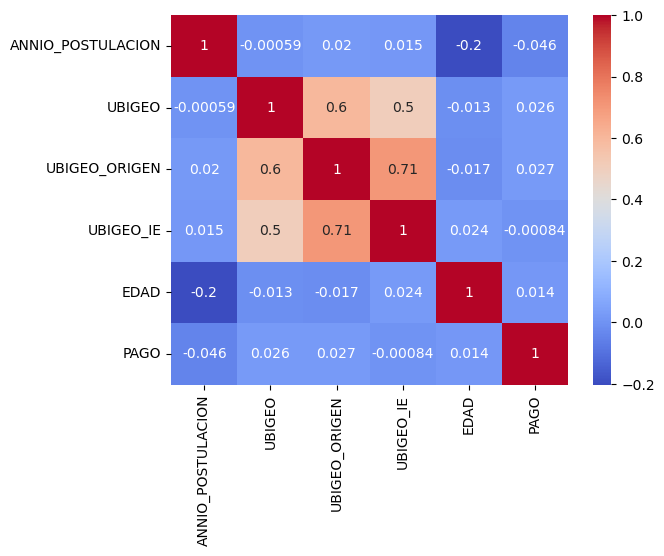

In [218]:
import seaborn as sns

correlation_matrix = Postulantes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [219]:
correlation_matrix

ANNIO_POSTULACION    UBIGEO  UBIGEO_ORIGEN  UBIGEO_IE  \
ANNIO_POSTULACION           1.000000 -0.000593       0.019879   0.014639   
UBIGEO                     -0.000593  1.000000       0.600062   0.503287   
UBIGEO_ORIGEN               0.019879  0.600062       1.000000   0.706603   
UBIGEO_IE                   0.014639  0.503287       0.706603   1.000000   
EDAD                       -0.203129 -0.012758      -0.017430   0.024233   
PAGO                       -0.046252  0.026321       0.026984  -0.000839   

                       EDAD      PAGO  
ANNIO_POSTULACION -0.203129 -0.046252  
UBIGEO            -0.012758  0.026321  
UBIGEO_ORIGEN     -0.017430  0.026984  
UBIGEO_IE          0.024233 -0.000839  
EDAD               1.000000  0.014392  
PAGO               0.014392  1.000000

In [220]:
Postulantes.columns

Index(['UUID', 'ESCUELA', 'MODALIDAD', 'ANNIO_POSTULACION', 'UBIGEO',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO_ORIGEN',
       'DEPARTAMENTO_ORIGEN', 'PROVINCIA_ORIGEN', 'DISTRITO_ORIGEN',
       'UBIGEO_IE', 'DEPARTAMENTO_IE', 'PROVINCIA_IE', 'DISTRITO_IE', 'EDAD',
       'SEXO', 'PAGO', 'IDIOMA', 'LEE', 'ESCRIBE', 'HABLA',
       'TIENE_DISCAPACIDAD', 'TIPO_COMUNIDAD', 'COMUNIDAD'],
      dtype='object')

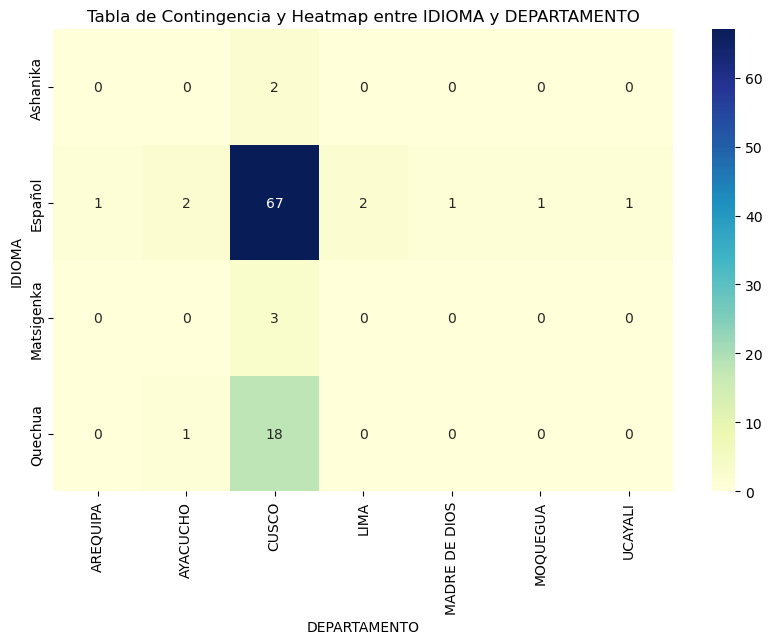

In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la tabla de contingencia entre IDIOMA y DISTRITO_IE
contingency_table = pd.crosstab(
    Postulantes2["IDIOMA"], Postulantes2["DEPARTAMENTO"]
)

# Generar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Tabla de Contingencia y Heatmap entre IDIOMA y DEPARTAMENTO")
plt.xlabel("DEPARTAMENTO")
plt.ylabel("IDIOMA")
plt.show()

In [222]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Supongamos que quieres seleccionar 2 alumnos por escuela
alumnos_por_escuela = 20

# Crear una función personalizada para seleccionar n alumnos por grupo
def seleccionar_n_alumnos(group, n):
    if len(group) >= n:
        return group.sample(n=n, random_state=42)
    else:
        return group

# Aplicar la función de selección a cada grupo (escuela)
muestra_estratificada = Postulantes.groupby('ESCUELA', group_keys=False).apply(lambda x: seleccionar_n_alumnos(x, alumnos_por_escuela))

# Restablecer el índice si es necesario
Postulantes2 = muestra_estratificada.reset_index(drop=True)

In [223]:
import pandas as pd

# Seleccionar columnas categóricas
columnas_categoricas = Postulantes.select_dtypes(include=['object'])
similarity_df = sampled_correlation_df


In [224]:
# Cantidad de valores únicos para cada columna
print(Postulantes.nunique())

UUID                   3748
ESCUELA                   6
MODALIDAD                 8
ANNIO_POSTULACION         5
UBIGEO                  210
DEPARTAMENTO             21
PROVINCIA                65
DISTRITO                202
UBIGEO_ORIGEN           157
DEPARTAMENTO_ORIGEN      12
PROVINCIA_ORIGEN         41
DISTRITO_ORIGEN         140
UBIGEO_IE               166
DEPARTAMENTO_IE          15
PROVINCIA_IE             46
DISTRITO_IE             150
EDAD                     37
SEXO                      2
PAGO                      7
IDIOMA                    8
LEE                       2
ESCRIBE                   2
HABLA                     2
TIENE_DISCAPACIDAD        2
TIPO_COMUNIDAD            3
COMUNIDAD                 5
dtype: int64


## Seleccion de Caracteristicas

EN Base al EDA (Analisis exploratorio de los datos que se realizo a continuacion se prentende solo seleccionar algunas caracteristicas)

In [225]:
columnas = ["UBIGEO_ORIGEN", "UBIGEO", "UBIGEO_IE"]
Postulantes = Postulantes.drop(columns=columnas)

## Codificacion de las varibles categoricas del conjunto de datos

In [226]:
Postulantes_sin_faltantes = Postulantes.dropna()


In [227]:
from sklearn.preprocessing import LabelEncoder

def codificar_variables_categoricas(dataframe):
    """
    Codifica todas las variables categóricas en un DataFrame utilizando LabelEncoder.

    Parámetros:
    - dataframe: El DataFrame que contiene las variables categóricas a codificar.

    Retorna:
    - Un nuevo DataFrame con las variables categóricas codificadas.
    """

    # Crear una copia del DataFrame para no modificar el original
    df_codificado = dataframe.copy()

    # Obtener la lista de columnas categóricas
    columnas_categoricas = df_codificado.select_dtypes(include=['object']).columns.tolist()

    # Inicializar el codificador de etiquetas
    label_encoder = LabelEncoder()

    # Iterar a través de las columnas categóricas y codificarlas
    for columna in columnas_categoricas:
        df_codificado[columna] = label_encoder.fit_transform(df_codificado[columna])


    return df_codificado


In [228]:
postulantes_codificados = codificar_variables_categoricas(Postulantes)


In [229]:
postulantes_codificados.describe()

UUID      ESCUELA    MODALIDAD  ANNIO_POSTULACION  DEPARTAMENTO  \
count  3748.000000  3748.000000  3748.000000        3748.000000   3748.000000   
mean   1873.500000     3.344184     5.290822        2021.091249      5.228122   
std    1082.098732     1.193569     1.995792           1.590336      2.122355   
min       0.000000     0.000000     0.000000        2019.000000      0.000000   
25%     936.750000     3.000000     6.000000        2019.000000      5.000000   
50%    1873.500000     3.000000     6.000000        2021.000000      5.000000   
75%    2810.250000     4.000000     6.000000        2023.000000      5.000000   
max    3747.000000     5.000000     7.000000        2023.000000     20.000000   

         PROVINCIA     DISTRITO  DEPARTAMENTO_ORIGEN  PROVINCIA_ORIGEN  \
count  3748.000000  3748.000000          3748.000000       3748.000000   
mean     37.596852   130.118196             3.039755         22.281750   
std       9.016840    50.235874             0.712666          4.158408   
min       0.000000     0.000000             0.000000          0.000000   
25%      40.000000    81.000000             3.000000         23.000000   
50%      40.000000   160.000000             3.000000         23.000000   
75%      40.000000   160.000000             3.000000         23.000000   
max      64.000000   201.000000            11.000000         40.000000   

       DISTRITO_ORIGEN  ...         EDAD         SEXO         PAGO  \
count      3748.000000  ...  3748.000000  3748.000000  3748.000000   
mean         89.019477  ...    20.303095     0.596585   178.444504   
std          32.530348  ...     4.347701     0.490648    64.901707   
min           0.000000  ...    15.000000     0.000000     0.000000   
25%          66.000000  ...    18.000000     0.000000   200.000000   
50%         108.000000  ...    19.000000     1.000000   200.000000   
75%         108.000000  ...    21.000000     1.000000   200.000000   
max         139.000000  ...    67.000000     1.000000   670.000000   

            IDIOMA          LEE      ESCRIBE        HABLA  TIENE_DISCAPACIDAD  \
count  3748.000000  3748.000000  3748.000000  3748.000000         3748.000000   
mean      4.740928     1.230256     1.060566     1.081110            0.511473   
std       2.185148     0.471298     0.664244     0.646343            0.869141   
min       0.000000     0.000000     0.000000     0.000000            0.000000   
25%       3.000000     1.000000     1.000000     1.000000            0.000000   
50%       3.000000     1.000000     1.000000     1.000000            0.000000   
75%       8.000000     2.000000     2.000000     2.000000            2.000000   
max       8.000000     2.000000     2.000000     2.000000            2.000000   

       TIPO_COMUNIDAD    COMUNIDAD  
count     3748.000000  3748.000000  
mean         2.159018     2.761740  
std          0.624050     1.333023  
min          0.000000     0.000000  
25%          2.000000     2.000000  
50%          2.000000     2.000000  
75%          3.000000     5.000000  
max          3.000000     5.000000  

[8 rows x 23 columns]

In [231]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Crear una copia del DataFrame para evitar modificar el original
df_normalized = postulantes_codificados.copy()
df_standardized = postulantes_codificados.copy()

# Seleccionar las columnas numéricas para normalizar y estandarizar
numeric_columns = [
    "ANNIO_POSTULACION",
    "DEPARTAMENTO",
    "PROVINCIA",
    "DISTRITO",
    "DEPARTAMENTO_ORIGEN",
    "PROVINCIA_ORIGEN",
    "DISTRITO_ORIGEN",
    "PAGO",
    "LEE",
    "ESCRIBE",
    "HABLA",
    "TIENE_DISCAPACIDAD",
    "TIPO_COMUNIDAD",
    "COMUNIDAD",
]

# Normalizar los datos
scaler = MinMaxScaler()
df_normalized[numeric_columns] = scaler.fit_transform(df_normalized[numeric_columns])

# Estandarizar los datos
scaler = StandardScaler()
df_standardized[numeric_columns] = scaler.fit_transform(
    df_standardized[numeric_columns]
)

# Mostrar las primeras filas de los DataFrames normalizados y estandarizados
print("DataFrame Normalizado:")
print(df_normalized.head())

print("\nDataFrame Estandarizado:")
print(df_standardized.head())

DataFrame Normalizado:
   UUID  ESCUELA  MODALIDAD  ANNIO_POSTULACION  DEPARTAMENTO  PROVINCIA  \
0  3442        4          7               0.25          0.25      0.625   
1   946        4          7               0.25          0.25      0.625   
2  1368        3          7               0.25          0.25      0.625   
3   575        5          7               0.25          0.25      0.625   
4   823        4          7               0.25          0.25      0.625   

   DISTRITO  DEPARTAMENTO_ORIGEN  PROVINCIA_ORIGEN  DISTRITO_ORIGEN  ...  \
0  0.796020             0.272727             0.575         0.776978  ...   
1  0.796020             0.272727             0.575         0.776978  ...   
2  0.796020             0.272727             0.575         0.776978  ...   
3  0.283582             0.272727             0.575         0.266187  ...   
4  0.796020             0.272727             0.575         0.776978  ...   

   EDAD  SEXO      PAGO  IDIOMA  LEE  ESCRIBE  HABLA  TIENE_DISCAPACI

In [232]:
df_standardized.describe()

UUID      ESCUELA    MODALIDAD  ANNIO_POSTULACION  DEPARTAMENTO  \
count  3748.000000  3748.000000  3748.000000       3.748000e+03  3.748000e+03   
mean   1873.500000     3.344184     5.290822       8.098822e-15  1.251223e-16   
std    1082.098732     1.193569     1.995792       1.000133e+00  1.000133e+00   
min       0.000000     0.000000     0.000000      -1.315148e+00 -2.463687e+00   
25%     936.750000     3.000000     6.000000      -1.315148e+00 -1.074995e-01   
50%    1873.500000     3.000000     6.000000      -5.738463e-02 -1.074995e-01   
75%    2810.250000     4.000000     6.000000       1.200379e+00 -1.074995e-01   
max    3747.000000     5.000000     7.000000       1.200379e+00  6.961063e+00   

          PROVINCIA      DISTRITO  DEPARTAMENTO_ORIGEN  PROVINCIA_ORIGEN  \
count  3.748000e+03  3.748000e+03         3.748000e+03      3.748000e+03   
mean  -2.445571e-16 -8.341484e-17        -1.801002e-16      4.132826e-16   
std    1.000133e+00  1.000133e+00         1.000133e+00      1.000133e+00   
min   -4.170183e+00 -2.590491e+00        -4.265895e+00     -5.358955e+00   
25%    2.665534e-01 -9.778819e-01        -5.579025e-02      1.727453e-01   
50%    2.665534e-01  5.949093e-01        -5.579025e-02      1.727453e-01   
75%    2.665534e-01  5.949093e-01        -5.579025e-02      1.727453e-01   
max    2.928595e+00  1.411168e+00         1.117116e+01      4.261393e+00   

       DISTRITO_ORIGEN  ...         EDAD         SEXO          PAGO  \
count     3.748000e+03  ...  3748.000000  3748.000000  3.748000e+03   
mean     -7.204009e-17  ...    20.303095     0.596585  1.516633e-16   
std       1.000133e+00  ...     4.347701     0.490648  1.000133e+00   
min      -2.736871e+00  ...    15.000000     0.000000 -2.749825e+00   
25%      -7.077252e-01  ...    18.000000     0.000000  3.321696e-01   
50%       5.835491e-01  ...    19.000000     1.000000  3.321696e-01   
75%       5.835491e-01  ...    21.000000     1.000000  3.321696e-01   
max       1.536633e+00  ...    67.000000     1.000000  7.574856e+00   

            IDIOMA           LEE       ESCRIBE         HABLA  \
count  3748.000000  3.748000e+03  3.748000e+03  3.748000e+03   
mean      4.740928 -6.066533e-17  1.213307e-16 -2.426613e-16   
std       2.185148  1.000133e+00  1.000133e+00  1.000133e+00   
min       0.000000 -2.610708e+00 -1.596864e+00 -1.672881e+00   
25%       3.000000 -4.886230e-01 -9.119197e-02 -1.255073e-01   
50%       3.000000 -4.886230e-01 -9.119197e-02 -1.255073e-01   
75%       8.000000  1.633462e+00  1.414480e+00  1.421866e+00   
max       8.000000  1.633462e+00  1.414480e+00  1.421866e+00   

       TIENE_DISCAPACIDAD  TIPO_COMUNIDAD     COMUNIDAD  
count        3.748000e+03    3.748000e+03  3.748000e+03  
mean         2.426613e-16   -6.066533e-17  2.426613e-16  
std          1.000133e+00    1.000133e+00  1.000133e+00  
min         -5.885593e-01   -3.460150e+00 -2.072063e+00  
25%         -5.885593e-01   -2.548504e-01 -5.715139e-01  
50%         -5.885593e-01   -2.548504e-01 -5.715139e-01  
75%          1.712870e+00    1.347799e+00  1.679310e+00  
max          1.712870e+00    1.347799e+00  1.679310e+00  

[8 rows x 23 columns]

In [234]:
import numpy as np

# Convertir el DataFrame a un array numpy
array_estudiantes = df_standardized.values

print(array_estudiantes)

[[ 3.44200000e+03  4.00000000e+00  7.00000000e+00 ... -5.88559305e-01
  -2.54850394e-01 -5.71513919e-01]
 [ 9.46000000e+02  4.00000000e+00  7.00000000e+00 ... -5.88559305e-01
  -2.54850394e-01 -5.71513919e-01]
 [ 1.36800000e+03  3.00000000e+00  7.00000000e+00 ... -5.88559305e-01
  -2.54850394e-01 -5.71513919e-01]
 ...
 [ 1.97500000e+03  5.00000000e+00  6.00000000e+00 ...  1.71287030e+00
   1.34779940e+00  1.67931008e+00]
 [ 2.44500000e+03  5.00000000e+00  6.00000000e+00 ...  1.71287030e+00
   1.34779940e+00  1.67931008e+00]
 [ 2.11000000e+02  5.00000000e+00  6.00000000e+00 ...  1.71287030e+00
   1.34779940e+00  1.67931008e+00]]


In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que DfEstudiantes contiene solo las columnas numéricas (sin UUID)
array_estudiantes = df_standardized.drop(columns=["UUID"]).values

# Calcular la matriz de similitud (correlación) entre los postulantes utilizando la distancia coseno
similarity_matrix = np.dot(array_estudiantes, array_estudiantes.T) / np.outer(
    np.linalg.norm(array_estudiantes, axis=1), np.linalg.norm(array_estudiantes, axis=1)
)

# Crear un DataFrame para la matriz de similitud
column_names = postulantes_codificados["UUID"].tolist()
similarity_df = pd.DataFrame(
    similarity_matrix, columns=column_names, index=column_names
)

In [236]:
similarity_df

3442      946       1368      575       823       2735      539   \
3442  1.000000  0.994604  0.994429  0.879552  0.994418  0.994604  0.993806   
946   0.994604  1.000000  0.999933  0.920399  0.999967  1.000000  0.999502   
1368  0.994429  0.999933  1.000000  0.921621  0.999967  0.999933  0.999567   
575   0.879552  0.920399  0.921621  1.000000  0.922142  0.920399  0.923487   
823   0.994418  0.999967  0.999967  0.922142  1.000000  0.999967  0.999600   
...        ...       ...       ...       ...       ...       ...       ...   
1089  0.992640  0.997678  0.997413  0.914794  0.997515  0.997678  0.996920   
1622  0.991924  0.997560  0.997558  0.922283  0.997658  0.997560  0.997341   
1975  0.550913  0.626683  0.628582  0.866980  0.629506  0.626683  0.631074   
2445  0.874666  0.914960  0.916036  0.989587  0.916556  0.914960  0.917758   
211   0.992589  0.997782  0.997583  0.916667  0.997684  0.997782  0.997154   

          1998      1381      162   ...      2157      2449      2713  \
3442  0.994559  0.993778  0.994396  ...  0.971997  0.992294  0.991395   
946   0.999866  0.999312  0.999934  ...  0.988569  0.997792  0.997358   
1368  0.999934  0.999311  0.999933  ...  0.988818  0.997725  0.997487   
575   0.919295  0.921804  0.922173  ...  0.956895  0.920220  0.925035   
823   0.999834  0.999345  0.999966  ...  0.989055  0.997825  0.997586   
...        ...       ...       ...  ...       ...       ...       ...   
1089  0.997408  0.996861  0.997548  ...  0.991149  0.999705  0.998798   
1622  0.997293  0.997165  0.997692  ...  0.993233  0.999827  0.999699   
1975  0.624789  0.628358  0.629313  ...  0.727908  0.641242  0.649552   
2445  0.913856  0.916221  0.916440  ...  0.962830  0.923665  0.928155   
211   0.997512  0.997030  0.997717  ...  0.991764  0.999869  0.999157   

          122       353       1089      1622      1975      2445      211   
3442  0.992050  0.880049  0.992640  0.991924  0.550913  0.874666  0.992589  
946   0.997700  0.920107  0.997678  0.997560  0.626683  0.914960  0.997782  
1368  0.997698  0.920905  0.997413  0.997558  0.628582  0.916036  0.997583  
575   0.921899  0.988200  0.914794  0.922283  0.866980  0.989587  0.916667  
823   0.997798  0.921433  0.997515  0.997658  0.629506  0.916556  0.997684  
...        ...       ...       ...       ...       ...       ...       ...  
1089  0.999477  0.924498  1.000000  0.999337  0.632682  0.918713  0.999967  
1622  0.999860  0.930277  0.999337  1.000000  0.644946  0.925570  0.999567  
1975  0.643998  0.878603  0.632682  0.644946  1.000000  0.884327  0.635584  
2445  0.925187  0.999417  0.918713  0.925570  0.884327  1.000000  0.920428  
211   0.999707  0.925942  0.999967  0.999567  0.635584  0.920428  1.000000  

[3748 rows x 3748 columns]

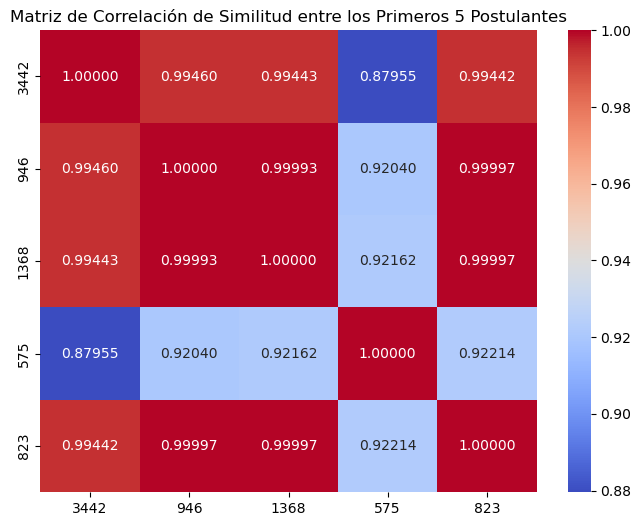

In [237]:
# Obtener las primeras 5 filas y 5 columnas del conjunto de datos similarity_df
primeros_5 = similarity_df.iloc[:5, :5]

# Mostrar la matriz de correlación en forma de mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(primeros_5, annot=True, cmap="coolwarm", fmt=".5f")
plt.title("Matriz de Correlación de Similitud entre los Primeros 5 Postulantes")
plt.show()

In [242]:
import pandas as pd
import numpy as np

# Supongamos que DfEstudiantes contiene solo las columnas numéricas (sin UUID)
numeric_columns = df_standardized.drop(columns=["UUID"])

# Calcular la matriz de correlación de Pearson entre las filas (postulantes)
correlation_matrix = numeric_columns.T.corr(method="pearson")

# Visualizar la matriz de correlación de Pearson
correlation_matrix

0         1         2         3         4         5         6     \
0     1.000000  0.994456  0.994254  0.869965  0.994292  0.994456  0.993873   
1     0.994456  1.000000  0.999926  0.912710  0.999965  1.000000  0.999493   
2     0.994254  0.999926  1.000000  0.914147  0.999965  0.999926  0.999568   
3     0.869965  0.912710  0.914147  1.000000  0.914534  0.912710  0.915202   
4     0.994292  0.999965  0.999965  0.914534  1.000000  0.999965  0.999588   
...        ...       ...       ...       ...       ...       ...       ...   
3743  0.993473  0.997837  0.997551  0.903325  0.997610  0.997837  0.996740   
3744  0.992781  0.997760  0.997770  0.911796  0.997823  0.997760  0.997250   
3745  0.492192  0.572433  0.574811  0.841759  0.575318  0.572433  0.574607   
3746  0.872010  0.913351  0.914695  0.990663  0.914945  0.913351  0.914802   
3747  0.993501  0.997997  0.997786  0.905351  0.997842  0.997997  0.997033   

          7         8         9     ...      3738      3739      3740  \
0     0.994316  0.993788  0.994216  ...  0.974305  0.993343  0.992726   
1     0.999858  0.999268  0.999927  ...  0.990281  0.998103  0.997840   
2     0.999933  0.999271  0.999926  ...  0.990597  0.998040  0.998000   
3     0.911879  0.913435  0.914784  ...  0.949396  0.909199  0.914278   
4     0.999829  0.999294  0.999965  ...  0.990709  0.998090  0.998036   
...        ...       ...       ...  ...       ...       ...       ...   
3743  0.997655  0.996708  0.997705  ...  0.991160  0.999677  0.998694   
3744  0.997589  0.997089  0.997921  ...  0.993458  0.999808  0.999697   
3745  0.571384  0.571853  0.575703  ...  0.672042  0.579367  0.587560   
3746  0.912794  0.913273  0.915186  ...  0.958411  0.917548  0.921925   
3747  0.997822  0.996929  0.997939  ...  0.991785  0.999857  0.999086   

          3741      3742      3743      3744      3745      3746      3747  
0     0.993158  0.877924  0.993473  0.992781  0.492192  0.872010  0.993501  
1     0.998049  0.919062  0.997837  0.997760  0.572433  0.913351  0.997997  
2     0.998060  0.920075  0.997551  0.997770  0.574811  0.914695  0.997786  
3     0.911021  0.988755  0.903325  0.911796  0.841759  0.990663  0.905351  
4     0.998106  0.920341  0.997610  0.997823  0.575318  0.914945  0.997842  
...        ...       ...       ...       ...       ...       ...       ...  
3743  0.999426  0.919001  1.000000  0.999252  0.570420  0.912387  0.999964  
3744  0.999850  0.925581  0.999252  1.000000  0.584596  0.920253  0.999510  
3745  0.582257  0.846470  0.570420  0.584596  1.000000  0.853466  0.573448  
3746  0.919132  0.999271  0.912387  0.920253  0.853466  1.000000  0.914175  
3747  0.999678  0.920472  0.999964  0.999510  0.573448  0.914175  1.000000  

[3748 rows x 3748 columns]

In [243]:
correlation_matrix = correlation_matrix.values

similarity_df = pd.DataFrame(
    correlation_matrix, columns=column_names, index=column_names
)
similarity_df

3442      946       1368      575       823       2735      539   \
3442  1.000000  0.994456  0.994254  0.869965  0.994292  0.994456  0.993873   
946   0.994456  1.000000  0.999926  0.912710  0.999965  1.000000  0.999493   
1368  0.994254  0.999926  1.000000  0.914147  0.999965  0.999926  0.999568   
575   0.869965  0.912710  0.914147  1.000000  0.914534  0.912710  0.915202   
823   0.994292  0.999965  0.999965  0.914534  1.000000  0.999965  0.999588   
...        ...       ...       ...       ...       ...       ...       ...   
1089  0.993473  0.997837  0.997551  0.903325  0.997610  0.997837  0.996740   
1622  0.992781  0.997760  0.997770  0.911796  0.997823  0.997760  0.997250   
1975  0.492192  0.572433  0.574811  0.841759  0.575318  0.572433  0.574607   
2445  0.872010  0.913351  0.914695  0.990663  0.914945  0.913351  0.914802   
211   0.993501  0.997997  0.997786  0.905351  0.997842  0.997997  0.997033   

          1998      1381      162   ...      2157      2449      2713  \
3442  0.994316  0.993788  0.994216  ...  0.974305  0.993343  0.992726   
946   0.999858  0.999268  0.999927  ...  0.990281  0.998103  0.997840   
1368  0.999933  0.999271  0.999926  ...  0.990597  0.998040  0.998000   
575   0.911879  0.913435  0.914784  ...  0.949396  0.909199  0.914278   
823   0.999829  0.999294  0.999965  ...  0.990709  0.998090  0.998036   
...        ...       ...       ...  ...       ...       ...       ...   
1089  0.997655  0.996708  0.997705  ...  0.991160  0.999677  0.998694   
1622  0.997589  0.997089  0.997921  ...  0.993458  0.999808  0.999697   
1975  0.571384  0.571853  0.575703  ...  0.672042  0.579367  0.587560   
2445  0.912794  0.913273  0.915186  ...  0.958411  0.917548  0.921925   
211   0.997822  0.996929  0.997939  ...  0.991785  0.999857  0.999086   

          122       353       1089      1622      1975      2445      211   
3442  0.993158  0.877924  0.993473  0.992781  0.492192  0.872010  0.993501  
946   0.998049  0.919062  0.997837  0.997760  0.572433  0.913351  0.997997  
1368  0.998060  0.920075  0.997551  0.997770  0.574811  0.914695  0.997786  
575   0.911021  0.988755  0.903325  0.911796  0.841759  0.990663  0.905351  
823   0.998106  0.920341  0.997610  0.997823  0.575318  0.914945  0.997842  
...        ...       ...       ...       ...       ...       ...       ...  
1089  0.999426  0.919001  1.000000  0.999252  0.570420  0.912387  0.999964  
1622  0.999850  0.925581  0.999252  1.000000  0.584596  0.920253  0.999510  
1975  0.582257  0.846470  0.570420  0.584596  1.000000  0.853466  0.573448  
2445  0.919132  0.999271  0.912387  0.920253  0.853466  1.000000  0.914175  
211   0.999678  0.920472  0.999964  0.999510  0.573448  0.914175  1.000000  

[3748 rows x 3748 columns]

In [246]:
import pandas as pd

# Crear una muestra aleatoria de 5 filas y 5 columnas del DataFrame de correlación
sampled_correlation_df = similarity_df.sample(n=1000, axis=0).sample(n=1000, axis=1)

# Mostrar la muestra aleatoria
print(sampled_correlation_df)

          2351      2142      2769      1626      3696      1571      452   \
1542  0.949535  0.992011  0.966826  0.952433  0.963505  0.979653  0.626658   
3267  0.896642  0.961106  0.928059  0.900225  0.923102  0.942485  0.657132   
3478  0.996288  0.966093  0.984629  0.995650  0.993380  0.982926  0.492605   
2168  0.553936  0.700714  0.618421  0.560334  0.595029  0.646581  0.673987   
3654  0.982021  0.995409  0.991446  0.985802  0.991068  0.996560  0.557077   
...        ...       ...       ...       ...       ...       ...       ...   
2213  0.995845  0.986646  0.996506  0.998637  0.997423  0.996003  0.514178   
3520  0.996367  0.986420  0.995548  0.999253  0.997596  0.996033  0.504885   
908   0.986477  0.994208  0.988568  0.988123  0.991430  0.995042  0.565157   
743   0.890722  0.960655  0.911855  0.890707  0.909200  0.934683  0.698452   
2288  0.859303  0.932444  0.871273  0.854041  0.877407  0.902558  0.763630   

          3499      2203      240   ...      950       582     

In [247]:
import networkx as nx

# Crear una instancia del grafo
G = nx.Graph()
similarity_df = sampled_correlation_df
# Obtener los nombres de los postulantes (nodos)
postulantes = similarity_df.columns.tolist()

n=1000
# Agregar nodos al grafo
G.add_nodes_from(postulantes[:])

th = 0.98

# Crear un conjunto para rastrear las aristas ya agregadas
added_edges = set()

# Agregar aristas al grafo con los valores de similitud sin repeticiones
for i in range(len(postulantes[:])):
    for j in range(i + 1, len(postulantes[:])):
        # Filtro con el Threshold
        if abs(similarity_df.iloc[i, j]) >= th:
            # Ordenar nodos para asegurarse de que estén en el mismo orden
            nodes = tuple(sorted([postulantes[i], postulantes[j]]))
            if nodes not in added_edges:
                dist = 1 - similarity_df.iloc[i, j]
                G.add_edge(*nodes, weight=dist)
                added_edges.add(nodes)

# Mostrar información básica sobre el grafo
print("Número de nodos:", G.number_of_nodes())
print("Número de aristas:", G.number_of_edges())


Número de nodos: 1000
Número de aristas: 282738


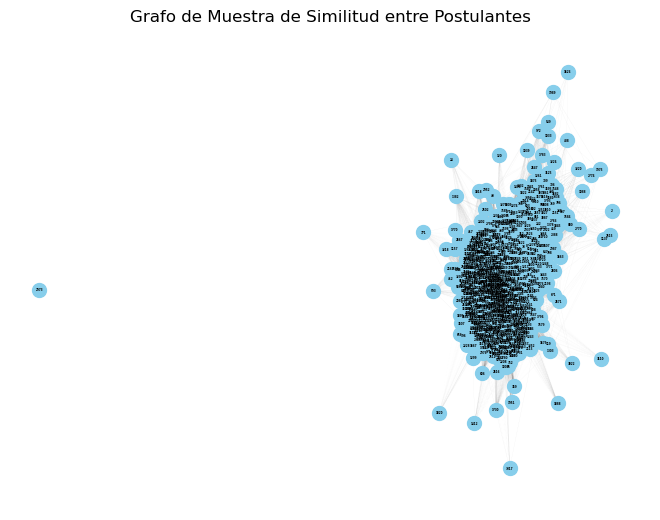

In [248]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear una disposición de nodos para la visualización
pos = nx.spring_layout(G, seed=42)

# Obtener los pesos de las aristas para ajustar el ancho de las aristas en la visualización
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]

# Crear el grafo utilizando la disposición de nodos y los pesos de las aristas
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=2, font_color='black',
        width=edge_weights, edge_color='gray', font_weight='bold')
# Ajustar el tamaño del gráfico
# Mostrar el grafo
plt.title("Grafo de Muestra de Similitud entre Postulantes")
plt.show()


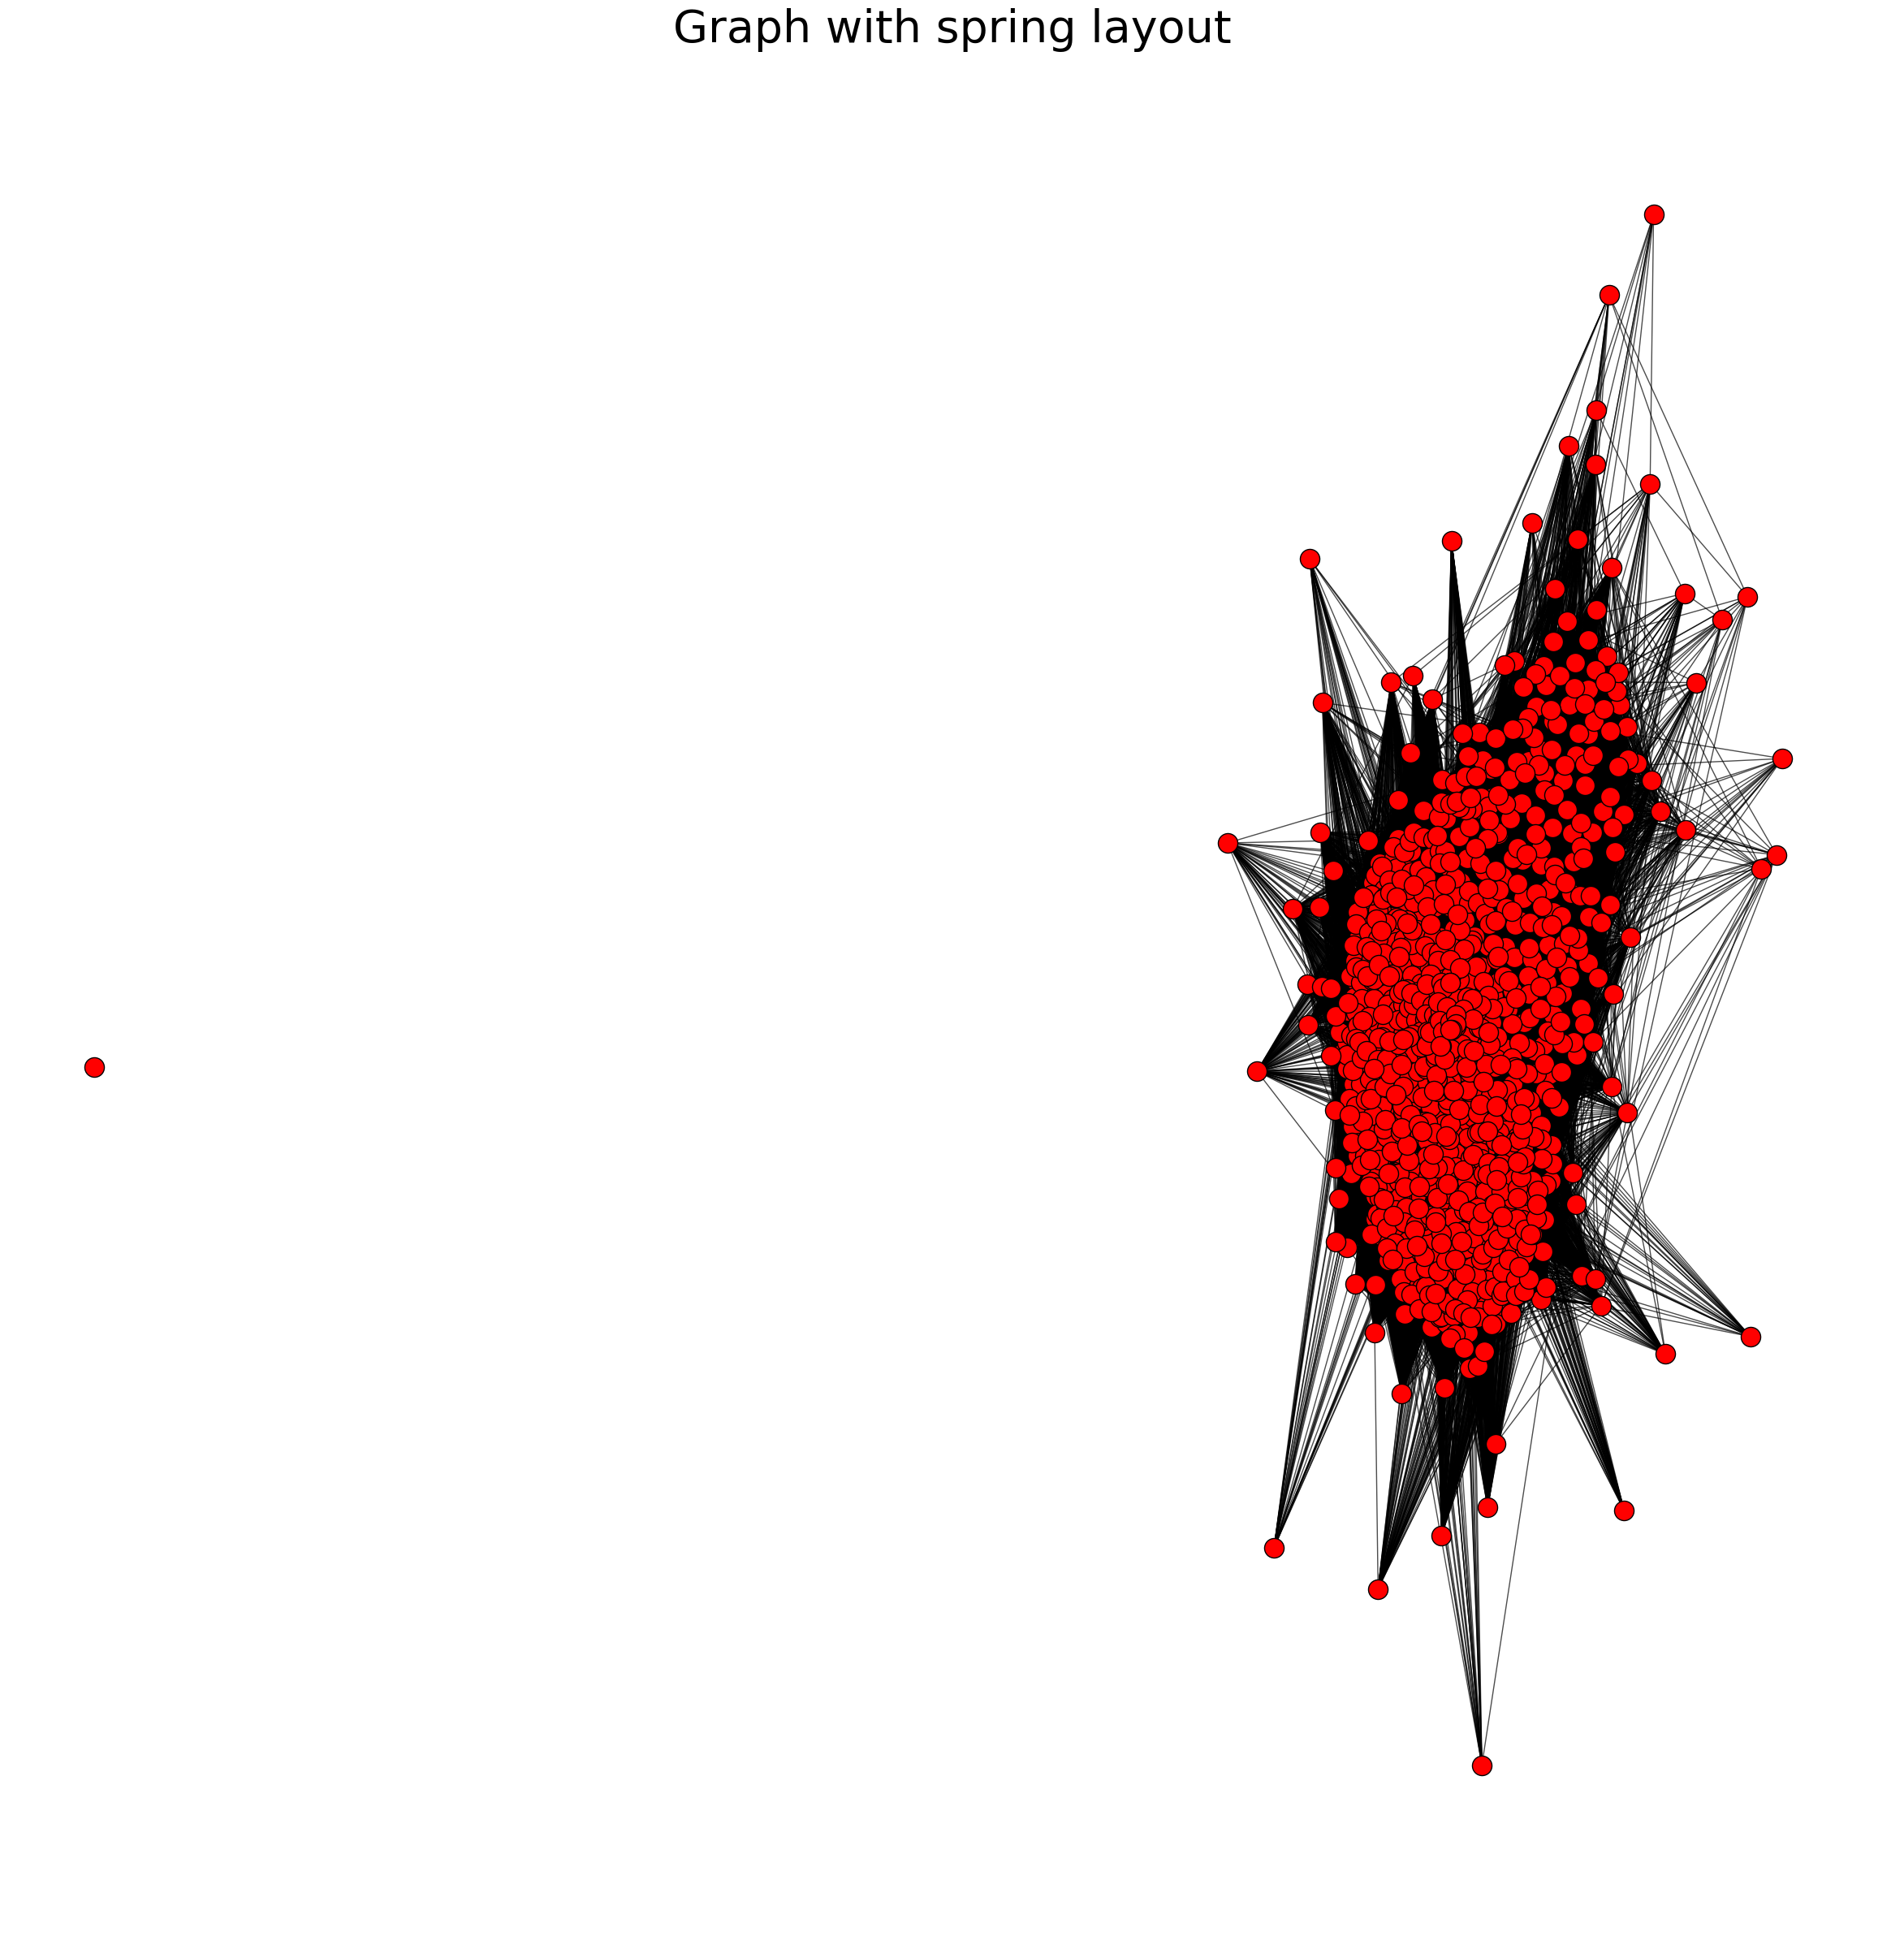

In [249]:
import networkx as nx
import matplotlib.pyplot as plt

# ... (código para construir el grafo G)

plt.figure(figsize=(30, 30))
spring_layout = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, spring_layout, node_color='r', edgecolors='k')
nx.draw_networkx_edges(G, spring_layout, alpha=0.7)

plt.title('Graph with spring layout', fontdict={'fontsize': 40})
plt.axis('off')
plt.show()